<style>
    .golden-alert {
        background-color: gold;
        font-weight: bold;
    }
    .golden-alert h1, 
    .golden-alert h3 {
        font-weight: bold;
    }
</style>

<div class="alert alert-block alert-info golden-alert">
    <h1 align="center">SKLearn Nearest Neighbor</h1>
    <h3 align="center"> Machine Learning Course</h3>
</div>

#### Load Dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

#### Set Hyperparameters

In [2]:
PATH_DATA = "../data/"

#### Load Data

In [3]:
iris = pd.read_csv(PATH_DATA + "iris.csv")
x = iris.drop(iris.species.name, axis=1)
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Train the Model

In [4]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
clusters = kmeans.predict(x)

#### Visualize the Results

In [5]:
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [6]:
centroids = kmeans.cluster_centers_
centroids

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22712\1489266972.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


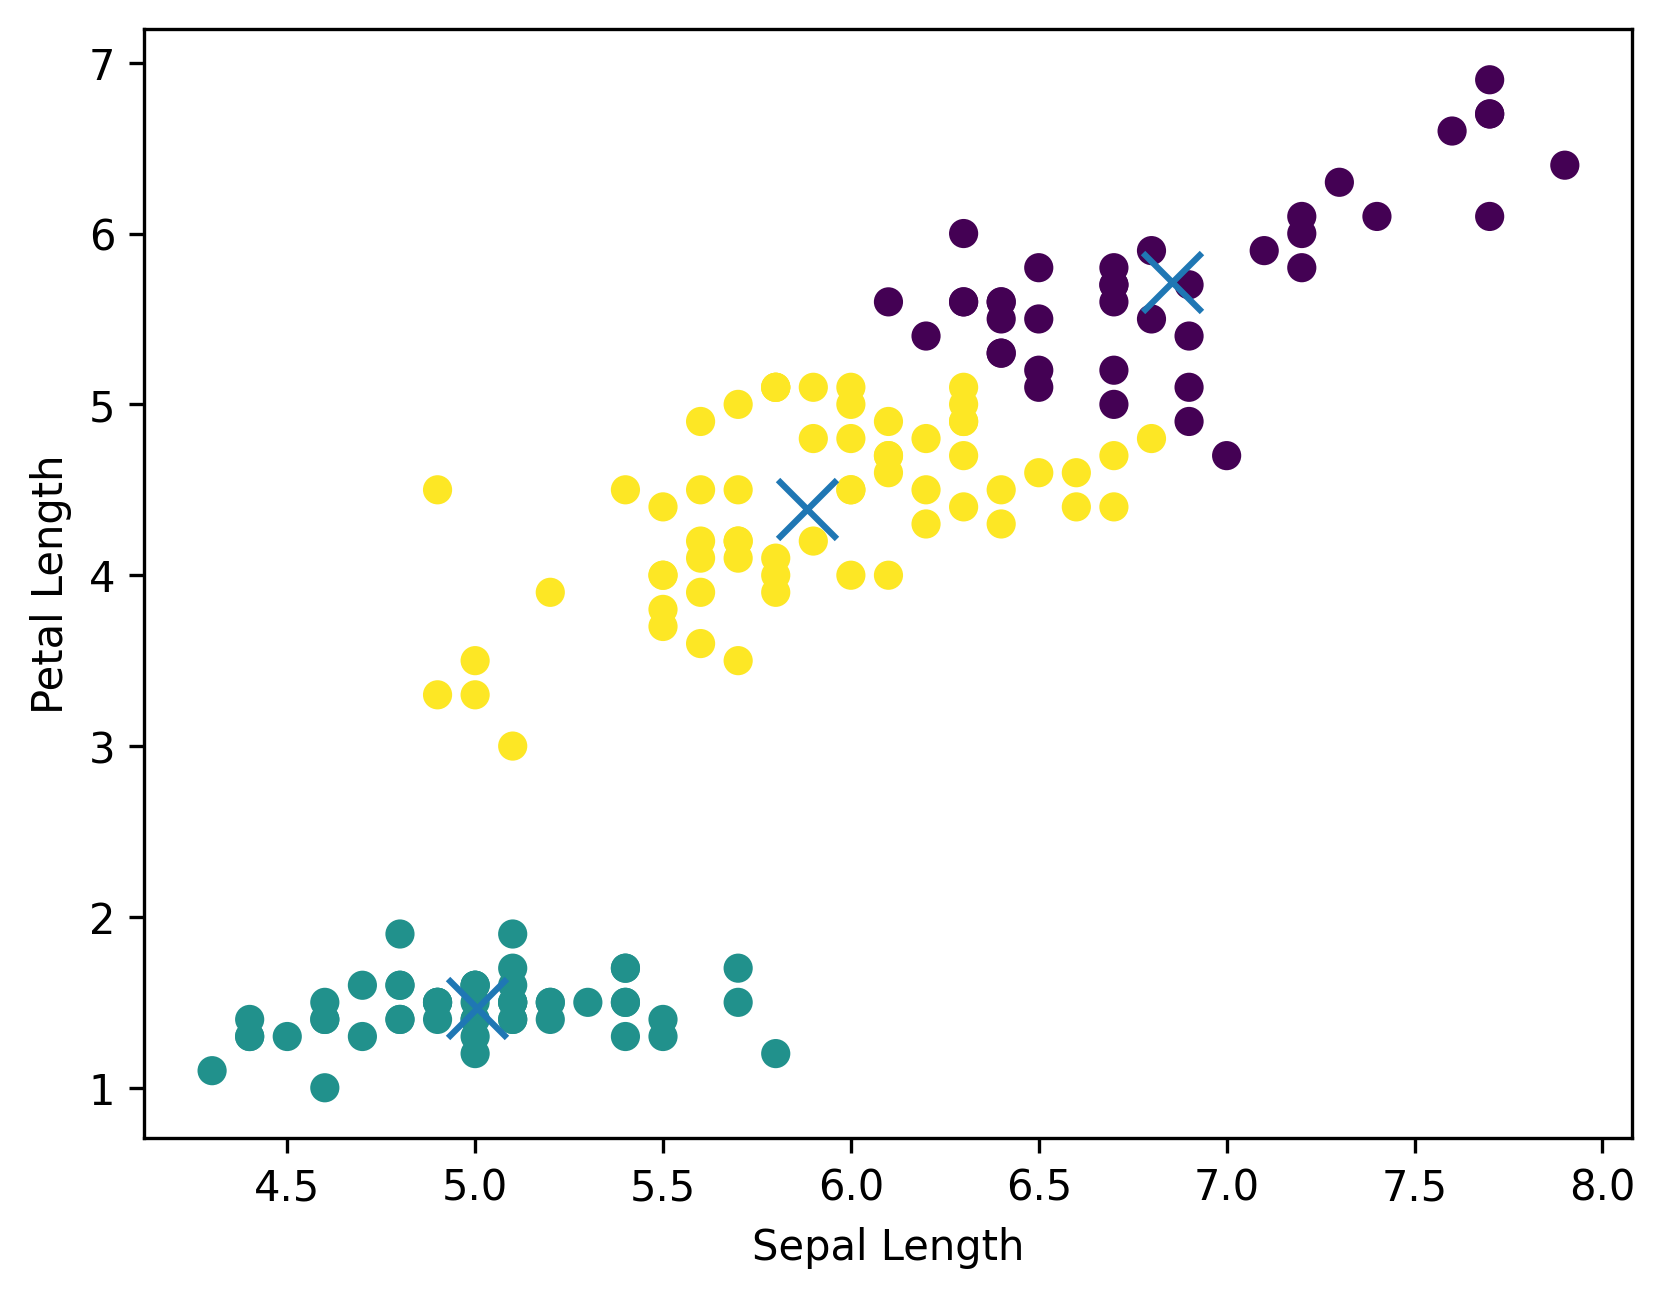

In [7]:
fig, ax = plt.subplots(dpi=300)
ax.scatter(x.iloc[:,0], x.iloc[:,2], c=clusters)
ax.scatter(centroids[:,0], centroids[:,2], marker='x', s=200)
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Petal Length")
fig.show()

In [8]:
kmeans.inertia_

78.9450658259773

#### Tune the Hyperparameter

In [9]:
scores = []
for k in np.arange(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    scores.append(kmeans.inertia_)
scores

[680.8244,
 152.36870647733906,
 78.9450658259773,
 57.473273265494925,
 46.80170193050193,
 38.930963049671746,
 37.68215,
 30.077530998389697,
 28.919136123680243,
 26.397029845885115]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22712\2913278752.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


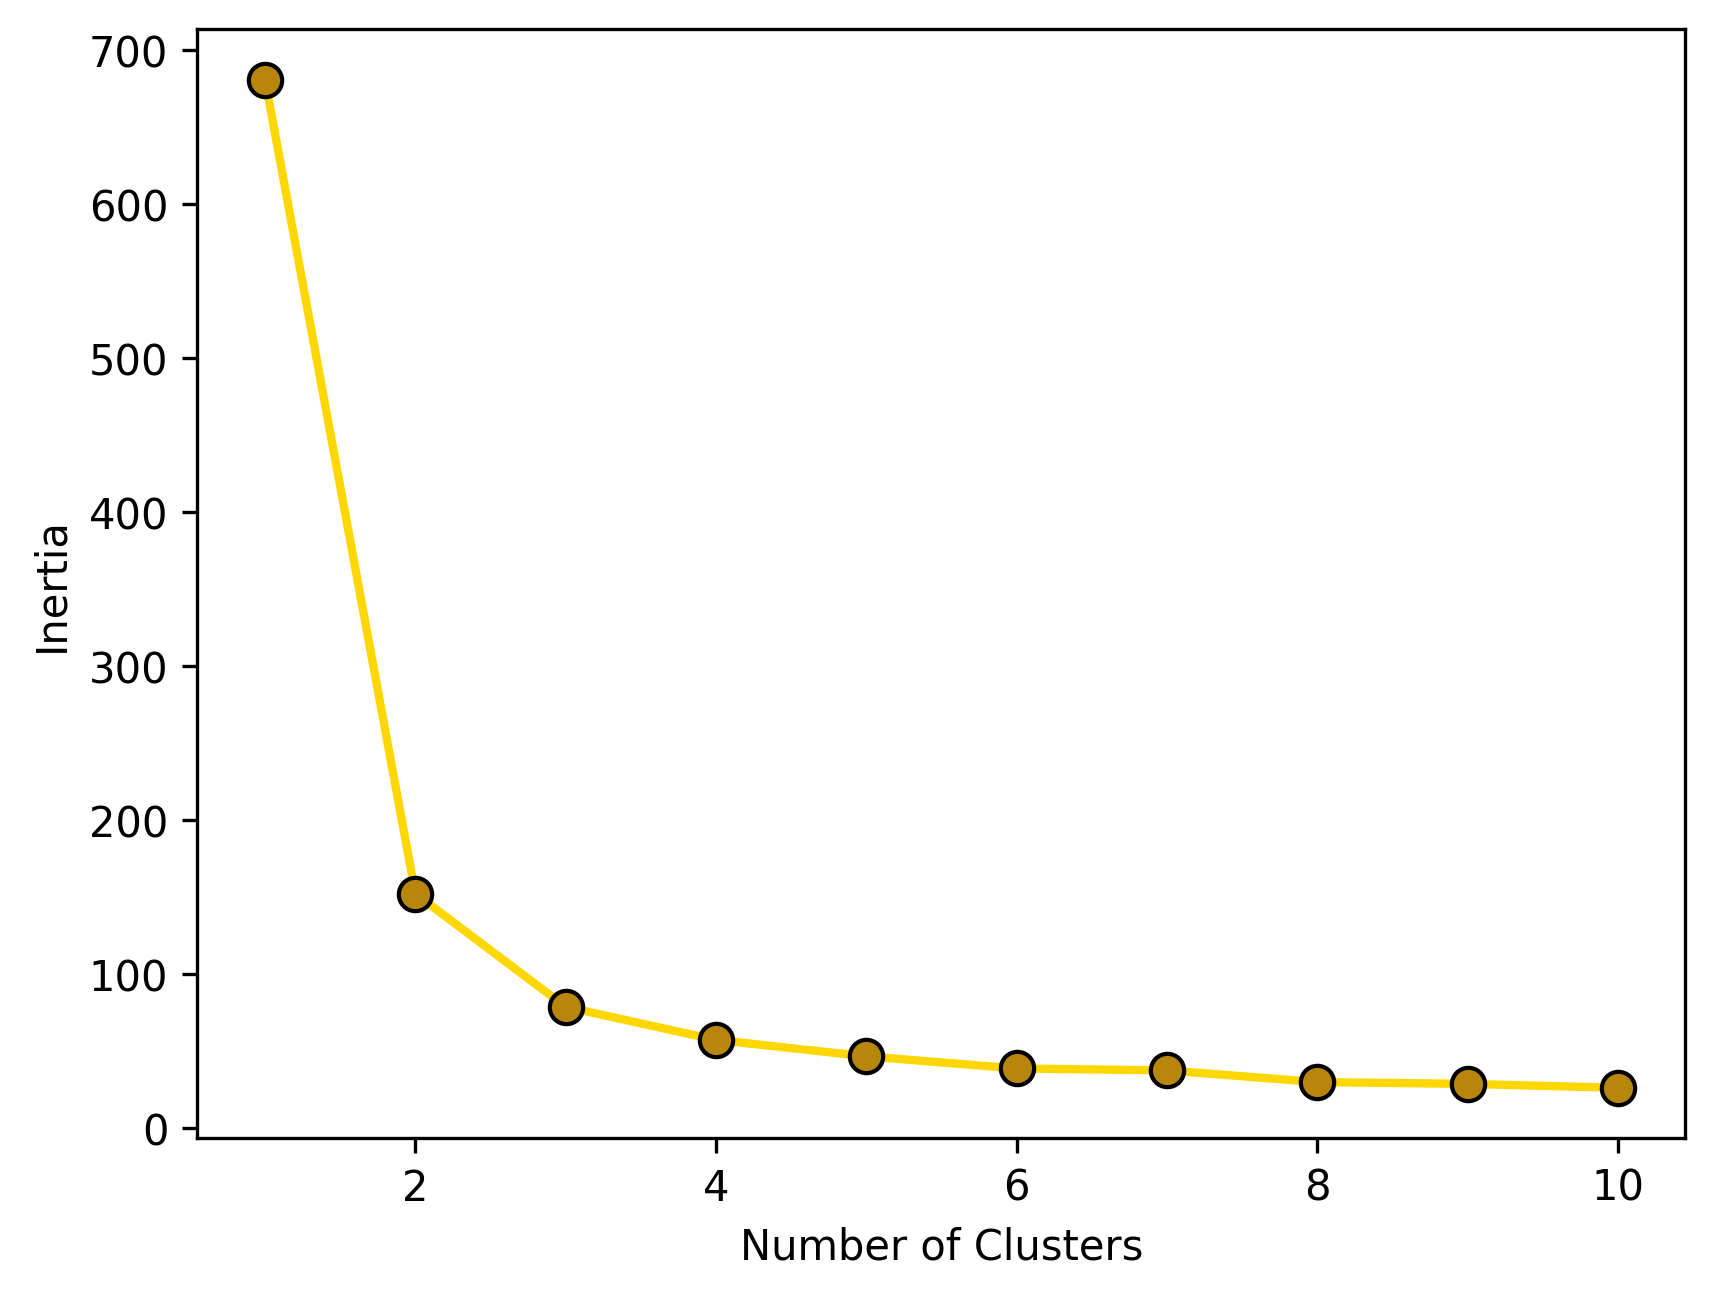

In [14]:
fig, ax = plt.subplots(dpi=300)
ax.plot(np.arange(1,11), scores, 'o-', 
        color='#FFD700',  
        linewidth=2,      
        markersize=8,    
        markerfacecolor='darkgoldenrod', 
        markeredgecolor='black',          
        markeredgewidth=1)               
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Inertia")
fig.show()